In [1]:
## Dint use any AI for coding Help - Ramya Mamidipaka


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import random

from scipy.stats import chi2_contingency
from pandasql import sqldf
from datetime import datetime



In [2]:
df_user=pd.read_csv('user_takehome.csv')
df_transaction=pd.read_csv('transaction_takehome.csv')
df_product=pd.read_csv('products_takehome.csv')

### DATA EXPLORATION - USER

### USER Table

In [5]:
df_user.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [6]:
df_user['CREATED_DATE'] = pd.to_datetime(df_user['CREATED_DATE'],
               format='%Y-%m-%d %H:%M:%S.%f Z')

df_user['BIRTH_DATE'] = pd.to_datetime(df_user['BIRTH_DATE'],
               format='%Y-%m-%d %H:%M:%S.%f Z')
df_user['BIRTH_YEAR'] = df_user['BIRTH_DATE'].dt.year.astype('Int64')
df_user['CREATED_YEAR'] = df_user['CREATED_DATE'].dt.year.astype('Int64')

df_user['BIRTH_MONTH'] = df_user['BIRTH_DATE'].dt.month.astype('Int64')

df_user['Age']= (((pd.to_datetime(datetime.now().date())- df_user['BIRTH_DATE']).dt.days)/365).round().astype('Int64')
df_user['Age_Account']= ((pd.to_datetime(datetime.now().date())- df_user['CREATED_DATE']).dt.days).astype('Int64')


In [7]:
df_user['BIRTH_YEAR'].max()

2022

In [8]:
df_user['BIRTH_YEAR'].min()

1900

In [9]:
df_user[df_user['CREATED_DATE']<=df_user['BIRTH_DATE']]

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,BIRTH_YEAR,CREATED_YEAR,BIRTH_MONTH,Age,Age_Account
41974,5f31fc048fa1e914d38d6952,2020-08-11 02:01:41,2020-10-02 15:27:28,CA,NaN,NaN,2020,2020,10,4,1635


<Axes: xlabel='Age', ylabel='Count'>

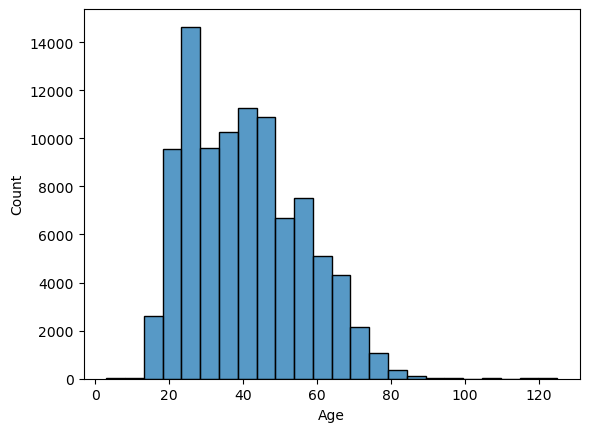

In [10]:
sns.histplot(data=df_user, x="Age",binwidth=5)

In [11]:
### defining generation through Birth_date Year
def generation(num):
    if num<=1927:
        return 'Greatest Generation'
    elif num<=1945:
        return 'Silent Generation'
    elif num<=1964:
        return 'Baby Boom'
    elif num<= 1980:
        return 'Generation X'
    elif num<=1996:
        return 'Millennial'
    elif num<=2010:
        return 'Generation Z'
    elif num<=2024:
        return 'Generation Alpha'
    elif num<=2039:
        return 'Generation Beta'

df_user['Generation']=df_user['BIRTH_YEAR'].apply(lambda x: generation(x))

### PRODUCT Table

In [13]:
df_product['BARCODE']=df_product['BARCODE'].astype('Int64', errors='ignore')

In [14]:
df_product.isnull().sum()/len(df_product)

CATEGORY_1      0.000131
CATEGORY_2      0.001684
CATEGORY_3      0.071629
CATEGORY_4      0.920219
MANUFACTURER    0.267842
BRAND           0.267839
BARCODE         0.004760
dtype: float64

In [15]:
df_product.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,796494407820
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,23278011028
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,461817824225
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,35000466815
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,806810850459


### TRANSACTION Table

In [18]:
df_transaction['BARCODE']=df_transaction['BARCODE'].astype('Int64', errors='ignore')

In [19]:
df_transaction['BARCODE'][0]

15300014978

In [20]:
df_transaction['FINAL_SALE'].unique()

array([' ', '1.49', '3.49', ..., '11.02', '20.17', '42.38'], dtype=object)

In [21]:
df_transaction['SCAN_DATE'] = pd.to_datetime(df_transaction['SCAN_DATE'],format='%Y-%m-%d %H:%M:%S.%f Z')
df_transaction['PURCHASE_DATE'] = pd.to_datetime(df_transaction['PURCHASE_DATE'],format='%m/%d/%Y')
df_transaction['FINAL_QUANTITY']=df_transaction['FINAL_QUANTITY'].apply(lambda x : 0 if x=='zero' else float(x)).apply('{:.2f}'.format).astype(float)
df_transaction['FINAL_SALE']=df_transaction['FINAL_SALE'].apply(lambda x : 0 if x==' ' else x).astype(float)
df_transaction['PURCHASE_Year']=df_transaction['PURCHASE_DATE'].dt.year.astype('Int64')

In [22]:
df_transaction.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,PURCHASE_Year
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539,WALMART,63b73a7f3d310dceeabd4758,15300014978,1.0,0.00,2024
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206,ALDI,62c08877baa38d1a1f6c211a,<NA>,0.0,1.49,2024
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813,WALMART,60842f207ac8b7729e472020,78742229751,1.0,0.00,2024
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468,FOOD LION,63fcd7cea4f8442c3386b589,783399746536,0.0,3.49,2024
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549,RANDALLS,6193231ae9b3d75037b0f928,47900501183,1.0,0.00,2024


In [23]:
##users not in df_user but present in df_transaction
df_diff = df_transaction[~df_transaction['USER_ID'].isin(df_user['ID'])]
len(df_diff)

49738

In [24]:
df_diff['USER_ID'].nunique()

17603

In [25]:
##barcodes not in df_product but present in df_transaction
df_diff = df_transaction[~df_transaction['BARCODE'].isin(df_product['BARCODE'])]
len(df_diff)

25170

In [26]:
df_diff['BARCODE'].nunique()

4465

# First: explore the data

#### Are there any data quality issues present?
##### The above cells have the references to the points noted below
##### USER TABLE
- Birthdate Year ranges from 1900 to 2022 which is clearly not feasible for that users to interact with Fetch
- One Entry where createddate is before Birthdate

##### PRODUCT TABLE
- With ~93% nulls in Category4 column, if possible we can either Drop it( as lot of caetgory4 info is already present in Category 3 ) or we need to maintain the columns more stringently

##### TRANSACTION TABLE
- Lot of non integer values in FINAL_QUANTITY column, Quantity is supposed to be a whole integer
- FINAL_SALE is having ' ' instead of nulls
- Since the Transactions table is related to product table through BARCODE, its important to have a non null BARCODE column
- there are 49738 transactions with 17603 different users whose details are not in user table(But these users should be in users table due to referential data integrity)
- there are 25170 transactions with 4465 different barcodes whose details are not in products table(But these products should be in products table due to referential data integrity)



#### Are there any fields that are challenging to understand?
- In the Transactions column- Scan_date and purchase_date need to be confirmed with their meaning. Purchase date is date of purchase of the product and scan date can be the date the receipt was scanned to capture the coins.!!



# Second: provide SQL queries

#### What are the top 5 brands by receipts scanned among users 21 and over?


In [32]:
query = """
Select p.brand , count(distinct t.receipt_id)
from df_transaction t 
join df_user u on t.user_id=u.id 
join df_product p on p.barcode=t.barcode
where u.age>=21 
group by 1
order by 2 desc, 1 asc limit 5
"""

run_query = lambda query: sqldf(query, globals())
run_query(query)

,BRAND,count(distinct t.receipt_id)
0,None,3
1,DOVE,3
2,NERDS CANDY,3
3,COCA-COLA,2
4,GREAT VALUE,2


In [33]:
# Unlike SQL, Pandas considers null values as equal when performing joins. 
# This means that rows with null values in the join columns will be matched with each other.

df_transaction_filtered = df_transaction[pd.notnull(df_transaction['USER_ID'])]
df_transaction_filtered = df_transaction_filtered[pd.notnull(df_transaction_filtered['BARCODE'])] 

df_user_filtered = df_user[pd.notnull(df_user['ID'])] 
df_product_filtered = df_product[pd.notnull(df_product['BARCODE'])]


df=df_transaction_filtered.merge(df_user_filtered, left_on='USER_ID', right_on='ID',how='inner').merge(df_product_filtered,on='BARCODE',how='inner')
df[df['Age']>=21].groupby('BRAND')['RECEIPT_ID'].nunique().nlargest(5)

BRAND
DOVE           3
NERDS CANDY    3
COCA-COLA      2
GREAT VALUE    2
HERSHEY'S      2
Name: RECEIPT_ID, dtype: int64

#### What are the top 5 brands by sales among users that have had their account for at least six months?


In [35]:
#### SInce it was unclear whether is the Quantity or Sales amount, I put both the queries

query = """
Select p.brand , sum( t.FINAL_SALE)
from df_transaction t 
join df_user u on t.user_id=u.id 
join df_product p on p.barcode=t.barcode
where u.Age_Account>=180 
group by 1
order by 2 desc, 1 asc limit 5
"""

run_query = lambda query: sqldf(query, globals())
run_query(query)

,BRAND,sum( t.FINAL_SALE)
0,CVS,72.00
1,TRIDENT,46.72
2,DOVE,42.88
3,COORS LIGHT,34.96
4,None,16.65


In [36]:
query = """
Select p.brand , sum( t.FINAL_QUANTITY)
from df_transaction t 
join df_user u on t.user_id=u.id 
join df_product p on p.barcode=t.barcode
where u.Age_Account>=180 
group by 1
order by 2 desc, 1 asc limit 5
"""

run_query = lambda query: sqldf(query, globals())
run_query(query)

,BRAND,sum( t.FINAL_QUANTITY)
0,None,5.0
1,DOVE,5.0
2,SOUR PATCH KIDS,4.0
3,TRESEMMÉ,4.0
4,COCA-COLA,3.0


#### What is the percentage of sales in the Health & Wellness category by generation?


In [38]:
query = """
with gen as (select distinct Generation from df_user )
select g.Generation,coalesce(perc_health,0) as percentage from gen g left join (
select generation, round(Health*100/tot_sale,2) as perc_health from(
Select u.generation, sum(case when CATEGORY_1='Health & Wellness' then FINAL_SALE else 0 end) as Health, sum(FINAL_SALE) as tot_sale
from df_transaction t 
join df_user u on t.user_id=u.id 
join df_product p on p.barcode=t.barcode
where u.Age_Account>=180 
group by 1)p )k on g.Generation=k.Generation
"""

run_query = lambda query: sqldf(query, globals())
run_query(query)

,Generation,percentage
0,Generation Z,0.00
1,Millennial,39.96
2,None,0.00
3,Generation X,29.87
4,Baby Boom,39.47
5,Silent Generation,0.00
6,Generation Alpha,0.00
7,Greatest Generation,0.00


In [39]:
df_transaction_filtered = df_transaction[pd.notnull(df_transaction['USER_ID'])]
df_transaction_filtered = df_transaction_filtered[pd.notnull(df_transaction_filtered['BARCODE'])] 

df_user_filtered = df_user[pd.notnull(df_user['ID'])] 
df_product_filtered = df_product[pd.notnull(df_product['BARCODE'])]


df=df_transaction_filtered.merge(df_user_filtered, left_on='USER_ID', right_on='ID',how='inner').merge(df_product_filtered,on='BARCODE',how='inner')
df['Total_sales_generation']=df.groupby(['Generation'])['FINAL_SALE'].transform('sum')
df_2= df.groupby(['Generation','CATEGORY_1']).agg({'FINAL_SALE':'sum','Total_sales_generation':'max'}).reset_index()
df_2['Perc']=(df_2['FINAL_SALE']*100/df_2['Total_sales_generation']).round(2)
df_2[df_2['CATEGORY_1']=='Health & Wellness']

,Generation,CATEGORY_1,FINAL_SALE,Total_sales_generation,Perc
3,Baby Boom,Health & Wellness,89.03,225.57,39.47
6,Generation X,Health & Wellness,41.50,138.95,29.87
9,Millennial,Health & Wellness,59.13,147.97,39.96


#### Who are Fetch’s power users?


##### In the below Graphs, we see a dip in Recency graph after 30 days, dip after 1 receipts, dip after 10$ final sale.

##### Therefore, A power User is someone who has gone through all through those resistances, with more than 1 receipts with sales of over 10$ in the past 30 days. In this given dataset, there are 1697 power users

In [54]:
## RFM ANALYSIS FOR power USERS

usage_recency = df_transaction.groupby('USER_ID')['PURCHASE_DATE'].max().reset_index()
usage_recency['recency']= (usage_recency['PURCHASE_DATE'].max()- usage_recency['PURCHASE_DATE']).dt.days

<Axes: xlabel='recency', ylabel='Density'>

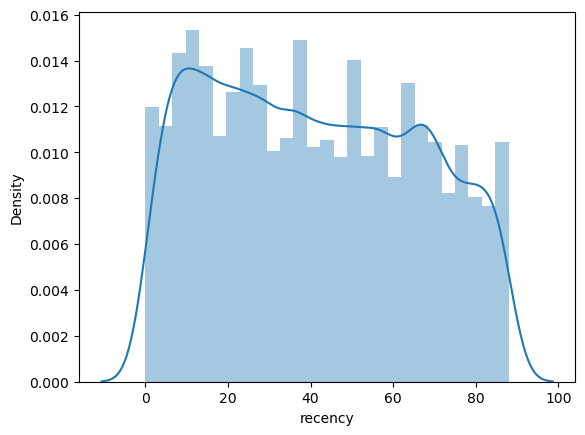

In [56]:
sns.distplot(usage_recency["recency"])

<Axes: xlabel='RECEIPT_ID', ylabel='Count'>

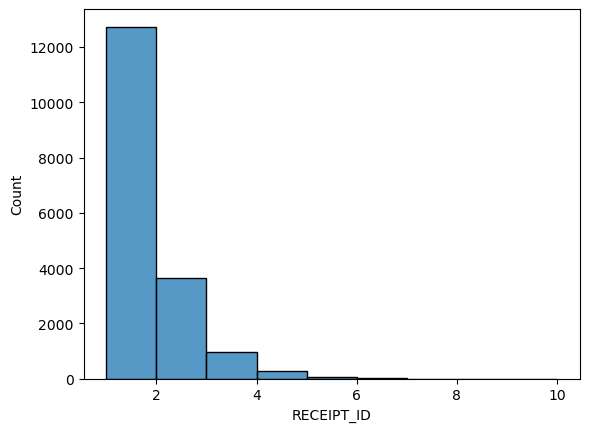

In [57]:
usage_frequency= df_transaction.groupby(['USER_ID'])['RECEIPT_ID'].nunique().reset_index()
sns.histplot(data=usage_frequency, x="RECEIPT_ID",binwidth=1)

<Axes: xlabel='FINAL_SALE', ylabel='Count'>

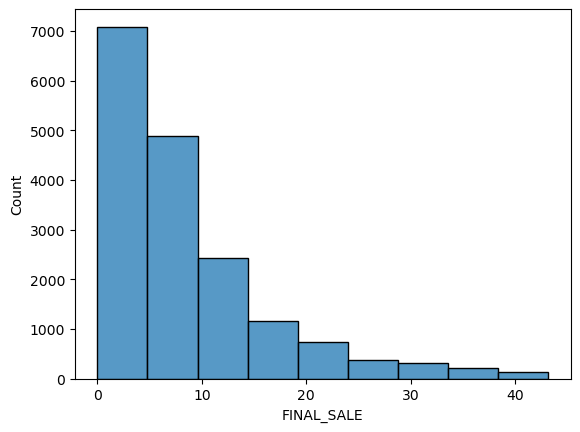

In [60]:
usage_monetary= df_transaction.groupby(['USER_ID'])['FINAL_SALE'].sum().reset_index()

usage_monetary=usage_monetary[usage_monetary['FINAL_SALE']<=usage_monetary['FINAL_SALE'].quantile(0.98)]

sns.histplot(data=usage_monetary, x="FINAL_SALE",binwidth=5)

In [61]:
usage_rfm = usage_recency.merge(usage_frequency).merge(usage_monetary).drop(columns=['PURCHASE_DATE'])
usage_rfm.columns = usage_rfm.columns.astype(str)
usage_rfm.set_index('USER_ID', inplace=True)

# ## removing outliers
# #usage_rfm=usage_rfm.reset_index()[usage_rfm.reset_index()['customerid']!='9130350918561660'].set_index('customerid')

# # Import library
# from sklearn.preprocessing import StandardScaler
# # Initialize the Object
# scaler = StandardScaler()
# # Fit and Transform The Data
# scaler.fit(usage_rfm)
# usage_rfm_normalized= scaler.transform(usage_rfm)
# # Assert that it has mean 0 and variance 1
# print(usage_rfm_normalized.mean(axis = 0).round(2)) 
# print(usage_rfm_normalized.std(axis = 0).round(2)) 

# from sklearn.cluster import KMeans
# from scipy.spatial.distance import cdist

# model = KMeans(init = 'k-means++',n_clusters=4, random_state=42)
# model.fit(usage_rfm_normalized)
# model.labels_.shape
# usage_rfm["Cluster"] = model.labels_

# usage_rfm.groupby('Cluster').mean().round(1)

In [64]:
power_users= usage_rfm[(usage_rfm['recency']<=30) & (usage_rfm['RECEIPT_ID']>1) & (usage_rfm['FINAL_SALE']>=10)]
len(power_users)

1697

#### Which is the leading brand in the Dips & Salsa category?

##### Here based on the highest sales , leading brands have been established as below


In [68]:

query = """
Select p.brand , sum( t.FINAL_SALE), count(distinct receipt_id)
from df_transaction t 
join df_user u on t.user_id=u.id 
join df_product p on p.barcode=t.barcode
where p.CATEGORY_2='Dips & Salsa' 
group by 1
order by 2 desc, 1 asc limit 1
"""

run_query = lambda query: sqldf(query, globals())
run_query(query)

,BRAND,sum( t.FINAL_SALE),count(distinct receipt_id)
0,MARZETTI,5.99,1


#### At what percent has Fetch grown year over year?


##### Growing of Fetch can be based on Transactions, users or products. But since Transactions are the most important amongst all
##### I would have considered YOY growth in transaction to calculate the same. But since we have only 4 months of data, I am considering users database

In [71]:

query = """

select CREATED_YEAR, coalesce( (users-lag(users) over (order by CREATED_YEAR asc))*100/lag(users) over (order by CREATED_YEAR asc),0) as perc_YoY_users_growth from(
select CREATED_YEAR,count(distinct ID) as users
from df_user group by 1)p
"""

run_query = lambda query: sqldf(query, globals())
run_query(query)

,CREATED_YEAR,perc_YoY_users_growth
0,2014,0
1,2015,70
2,2016,37
3,2017,820
4,2018,236
5,2019,227
6,2020,138
7,2021,13
8,2022,39
9,2023,-42


### Third: communicate with stakeholders


##### Hello Product
##### This is the data analyst working on the Transaction of June - Sep 2024 and have identified some potential data issues that need to be address to make the best data driven decisions. At Fetch we value data accuracy and data consistency to provide the best value to the users, In order to achieve it there are few steps that need to be taken,  I have summarized them below in each area, refer to the below:

##### USER TABLE
- Birthdate Year ranges from 1900 to 2022 which is clearly not feasible for that users to interact with Fetch
  - Are the Users signing up through Referrals?
  - And which channels have they signed up ? 
  - Are the Users churned? There are users from 2014, we need to understand whether the are still transacting or not? Because majority of the users are not in transaction table. This will help in our marketing efforts and reach out to the right users.

##### PRODUCT TABLE
- With ~93% nulls in Category4 column, if possible we can either Drop it( as lot of category4 info is already present in Category 3 ) or we need to maintain the columns more stringently
    - When was the product launched on the Fetch and is it still continuing or not? This will let us understand why only few products have transactions and others dont have any transactions
    - We also need to work on Product Launch date data point in the table 


##### TRANSACTION TABLE
- Lot of non integer values in FINAL_QUANTITY column, Quantity is supposed to be a whole integer
- FINAL_SALE is having ' ' instead of nulls
- Since the Transactions table is related to product table through BARCODE, its important to have a non null BARCODE column
- there are 49738 transactions with 17603 different users whose details are not in user table(But these users should be in users table due to referential data integrity)
- there are 25170 transactions with 4465 different barcodes whose details are not in products table(But these products should be in products table due to referential data integrity)

##### About the above, We need to allocate resources to resolve those issues and need to partner with the Data Engineering team in the next upcoming sprint.
##### Also Having worked on Metric repository initiatives earlier in my career, I strongly encourage we need to streamline the maintenance of the tables and include a data dictionary in the archives to make sense of the data. For that, we can start with manual intervention and create the repository and slowly we can automate it with the integration of tools like DBT into our tech stack. In this initiative , I need help in setting up a recurring meeting series until the issues are resolved with a member of the product team and DE to set the context and keep the ball rolling.!!

##### Interestingly even though the majority of the products are in 'HEALTH & WELLNESS' category , we see that 'Snacks' are the most consumed product. This can be confirmed by the data point if the products are still available to users (and continue to be shown in the app or not) or the product table is archive all products ever available to users.

In [88]:
## available products
df_product.groupby('CATEGORY_1')['BARCODE'].nunique().nlargest(5)

CATEGORY_1
Health & Wellness        510382
Snacks                   323018
Beverages                  3977
Pantry                      867
Apparel & Accessories       840
Name: BARCODE, dtype: int64

In [101]:
# Transacted Products
df.groupby('CATEGORY_1')['BARCODE'].nunique().nlargest(5)

CATEGORY_1
Snacks               47
Health & Wellness    17
Beverages             3
Alcohol               1
Dairy                 1
Name: BARCODE, dtype: int64